In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from photoz_utils import *
from bias_utils import *

In [2]:
# 1-1-1-1 Stratified
bayesian_1111 = pd.read_csv('/data/HSC/3_model_comparison/Archive_Corrections/bayesian_predictions_2.5_[1, 1, 1, 1]_v2.csv')
ensemble_1111 = pd.read_csv('/data/HSC/3_model_comparison/Archive_Corrections/ensemble_predictions_2.5_[1, 1, 1, 1]_v2.csv')
rf_1111 = pd.read_csv('/data/HSC/3_model_comparison/Archive/random_forest_predictions_2.5_[1, 1, 1, 1]_v2.csv')

ensemble_1111.drop(columns=['Unnamed: 0'], inplace=True)
bayesian_1111.drop(columns=['Unnamed: 0'], inplace=True)
rf_1111.drop(columns=['Unnamed: 0'], inplace=True)

ensemble_pred_1111 = ensemble_1111['predicted_redshift']
bayesian_pred_1111 = bayesian_1111['predicted_redshift']
rf_pred_1111 = rf_1111['predicted_redshift']

In [3]:
# Control
bayesian_ctrl = pd.read_csv('/mnt/data/HSC/3_model_comparison/Archive_Corrections/bayesian_predictions_2.5_control_v2.csv')
ensemble_ctrl = pd.read_csv('/mnt/data/HSC/3_model_comparison/Archive_Corrections/ensemble_predictions_2.5_control_v2.csv')
rf_ctrl = pd.read_csv('/data/HSC/3_model_comparison/Archive/random_forest_predictions_control_2.5_v2.csv')

ensemble_ctrl.drop(columns=['Unnamed: 0'], inplace=True)
bayesian_ctrl.drop(columns=['Unnamed: 0'], inplace=True)
rf_ctrl.drop(columns=['Unnamed: 0'], inplace=True)

ensemble_pred_ctrl = ensemble_ctrl['predicted_redshift']
bayesian_pred_ctrl = bayesian_ctrl['predicted_redshift']
rf_pred_ctrl = rf_ctrl['predicted_redshift']

In [4]:
# Control Oversampled
bayesian_ctrl_over = pd.read_csv('/mnt/data/HSC/3_model_comparison/bayesian_predictions_2.5_control_v2.csv')
ensemble_ctrl_over = pd.read_csv('/mnt/data/HSC/3_model_comparison/ensemble_predictions_2.5_control_v2.csv')
rf_ctrl_over = pd.read_csv('/data/HSC/3_model_comparison/random_forest_predictions_2.5_control_v2.csv')

ensemble_ctrl_over.drop(columns=['Unnamed: 0'], inplace=True)
bayesian_ctrl_over.drop(columns=['Unnamed: 0'], inplace=True)
rf_ctrl_over.drop(columns=['Unnamed: 0'], inplace=True)

ensemble_pred_ctrl_over = ensemble_ctrl_over['predicted_redshift']
bayesian_pred_ctrl_over = bayesian_ctrl_over['predicted_redshift']
rf_pred_ctrl_over = rf_ctrl_over['predicted_redshift']

In [5]:
# 1-1-1-1 Oversampled
bayesian_1111_over = pd.read_csv('/mnt/data/HSC/3_model_comparison/bayesian_predictions_2.5_[1, 1, 1, 1]_v2.csv')
ensemble_1111_over = pd.read_csv('/mnt/data/HSC/3_model_comparison/ensemble_predictions_2.5_[1, 1, 1, 1]_v2.csv')
rf_1111_over = pd.read_csv('/data/HSC/3_model_comparison/random_forest_predictions_2.5_[1, 1, 1, 1]_v2.csv')

ensemble_1111_over.drop(columns=['Unnamed: 0'], inplace=True)
bayesian_1111_over.drop(columns=['Unnamed: 0'], inplace=True)
rf_1111_over.drop(columns=['Unnamed: 0'], inplace=True)

ensemble_pred_1111_over = ensemble_1111_over['predicted_redshift']
bayesian_pred_1111_over = bayesian_1111_over['predicted_redshift']
rf_pred_1111_over = rf_1111_over['predicted_redshift']

In [6]:
ensemble_true = ensemble_ctrl['specz_redshift'] # they all have the same one
bayesian_true = bayesian_ctrl['specz_redshift']
rf_true = rf_ctrl['specz_redshift']
ensemble_true_over = ensemble_ctrl_over['specz_redshift'] # they all have the same one
bayesian_true_over = bayesian_ctrl_over['specz_redshift']
rf_true_over = rf_ctrl_over['specz_redshift']

In [7]:
####################### Model Comparisons ############################

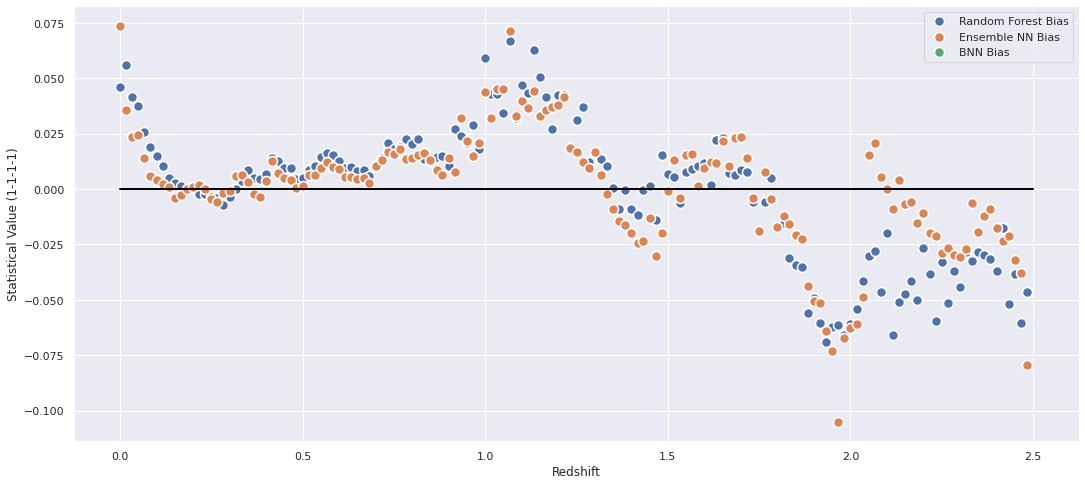

In [8]:
bias_rf_1111 = get_bias(rf_true, rf_pred_1111, 2.5)
bias_ensemble_1111 = get_bias(ensemble_true, ensemble_pred_1111, 2.5)
bias_bayesian_1111 = get_bias(bayesian_true, bayesian_pred_1111, 2.5)

plot_bias([bias_rf_1111, bias_ensemble_1111, bias_bayesian_1111], ['Random Forest Bias', 'Ensemble NN Bias', 'BNN Bias'], 'Statistical Value (1-1-1-1)', 2.5)

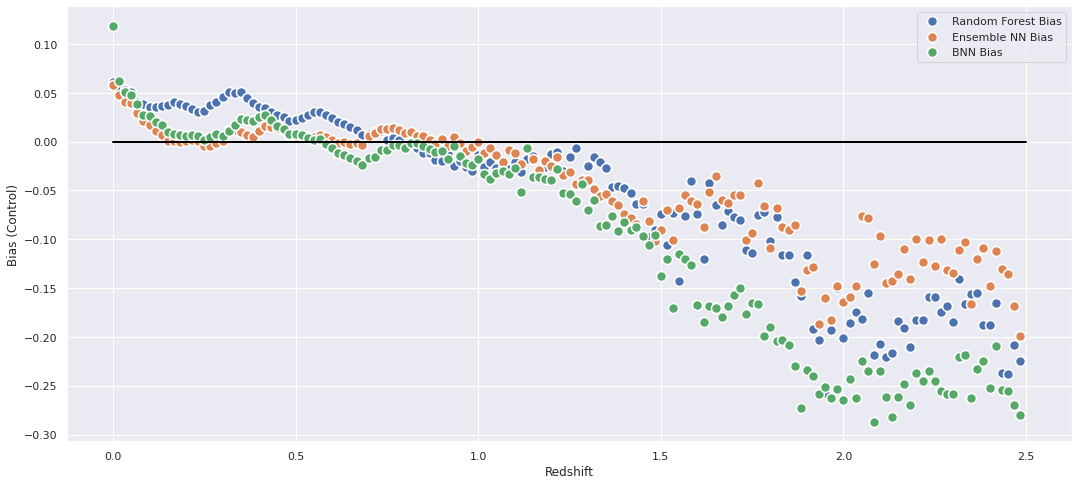

In [9]:
bias_rf_ctrl = get_bias(rf_true, rf_pred_ctrl, 2.5)
bias_ensemble_ctrl = get_bias(ensemble_true, ensemble_pred_ctrl, 2.5)
bias_bayesian_ctrl = get_bias(bayesian_true, bayesian_pred_ctrl, 2.5)

plot_bias([bias_rf_ctrl, bias_ensemble_ctrl, bias_bayesian_ctrl], ['Random Forest Bias', 'Ensemble NN Bias', 'BNN Bias'], 'Bias (Control)', 2.5)

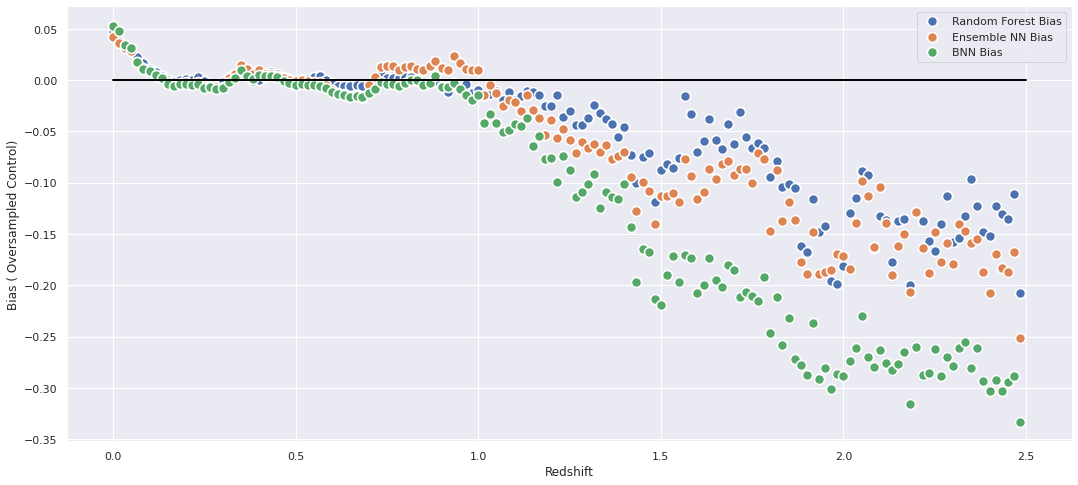

In [10]:
bias_rf_ctrl_over = get_bias(rf_true_over, rf_pred_ctrl_over, 2.5)
bias_ensemble_ctrl_over = get_bias(ensemble_true_over, ensemble_pred_ctrl_over, 2.5)
bias_bayesian_ctrl_over = get_bias(bayesian_true_over, bayesian_pred_ctrl_over, 2.5)

plot_bias([bias_rf_ctrl_over, bias_ensemble_ctrl_over, bias_bayesian_ctrl_over], ['Random Forest Bias', 'Ensemble NN Bias', 'BNN Bias'], 'Bias ( Oversampled Control)', 2.5)

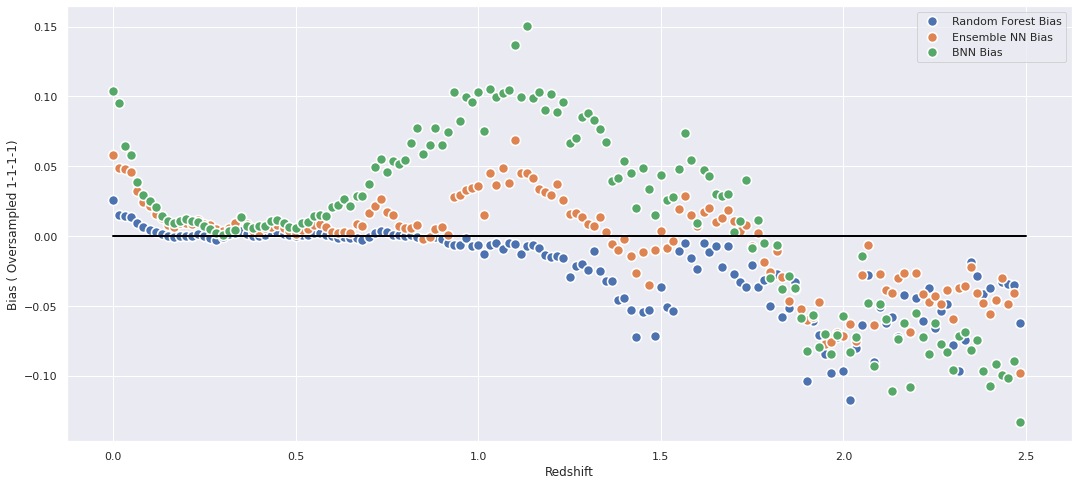

In [11]:
bias_rf_1111_over = get_bias(rf_true_over, rf_pred_1111_over, 2.5)
bias_ensemble_1111_over = get_bias(ensemble_true_over, ensemble_pred_1111_over, 2.5)
bias_bayesian_1111_over = get_bias(bayesian_true_over, bayesian_pred_1111_over, 2.5)

plot_bias([bias_rf_1111_over, bias_ensemble_1111_over, bias_bayesian_1111_over], ['Random Forest Bias', 'Ensemble NN Bias', 'BNN Bias'], 'Bias ( Oversampled 1-1-1-1)', 2.5)

In [12]:
################ Stratified vs Oversampled ########################

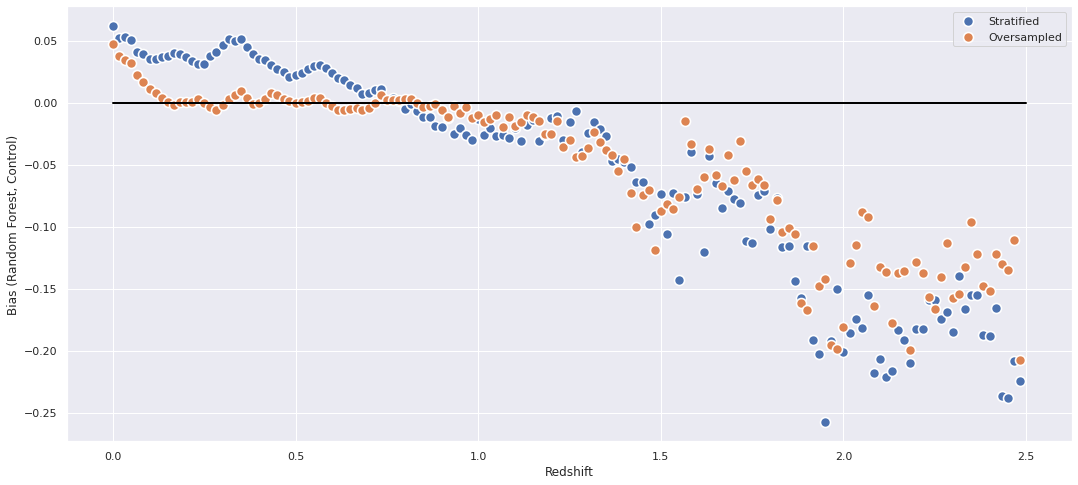

In [13]:
plot_bias([bias_rf_ctrl, bias_rf_ctrl_over], ['Stratified', 'Oversampled'], 'Bias (Random Forest, Control)', 2.5)

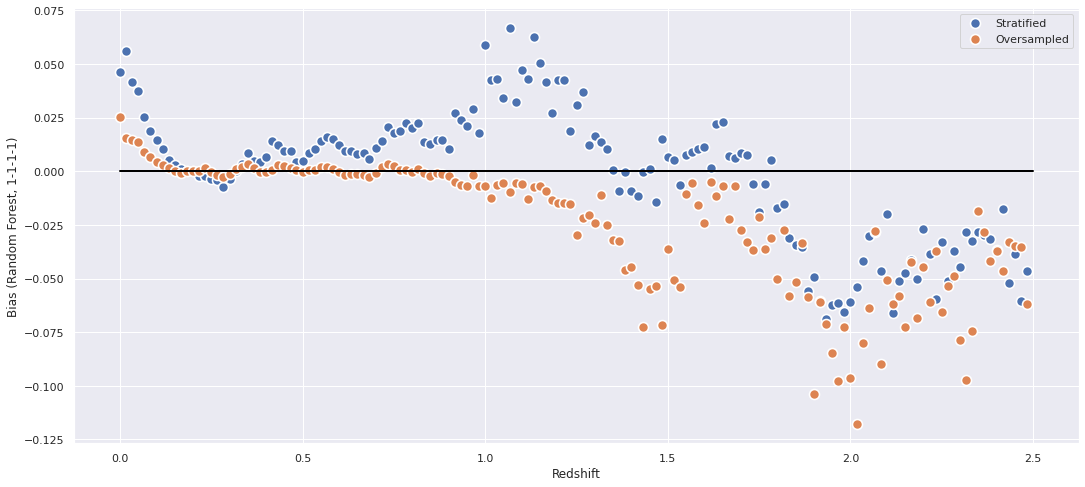

In [14]:
plot_bias([bias_rf_1111, bias_rf_1111_over], ['Stratified', 'Oversampled'], 'Bias (Random Forest, 1-1-1-1)', 2.5)

In [15]:
############## Control vs 1-1-1-1, Stratified ##############

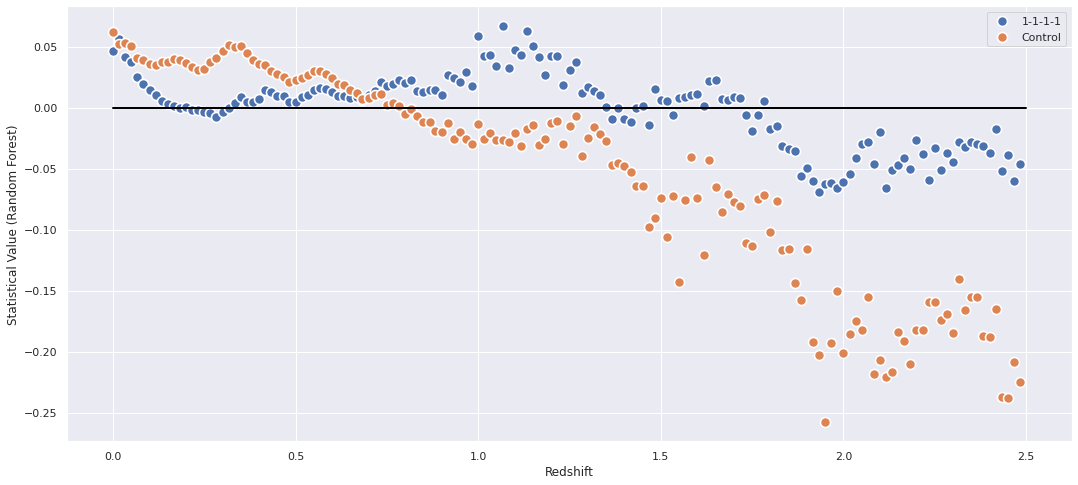

In [16]:
plot_bias([bias_rf_1111, bias_rf_ctrl], ['1-1-1-1', 'Control'], 'Statistical Value (Random Forest)', 2.5)

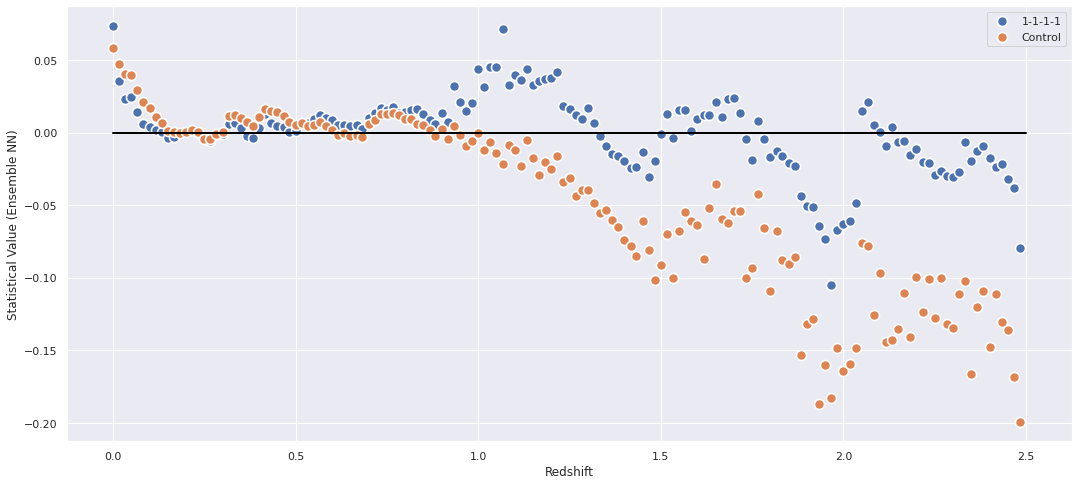

In [17]:
plot_bias([bias_ensemble_1111, bias_ensemble_ctrl], ['1-1-1-1', 'Control'], 'Statistical Value (Ensemble NN)', 2.5)

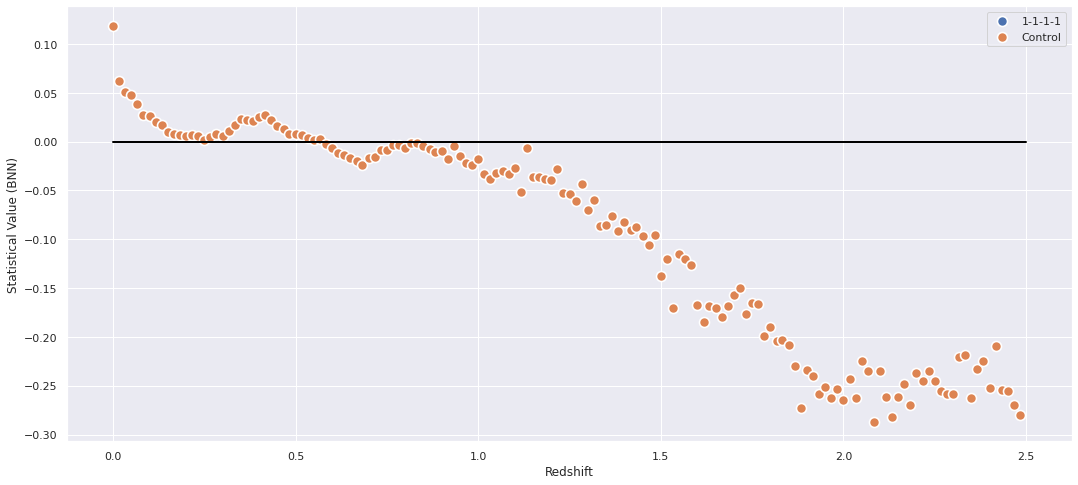

In [18]:
plot_bias([bias_bayesian_1111, bias_bayesian_ctrl], ['1-1-1-1', 'Control'], 'Statistical Value (BNN)', 2.5)

In [19]:
################# Control vs 1-1-1-1, Oversampled ##################

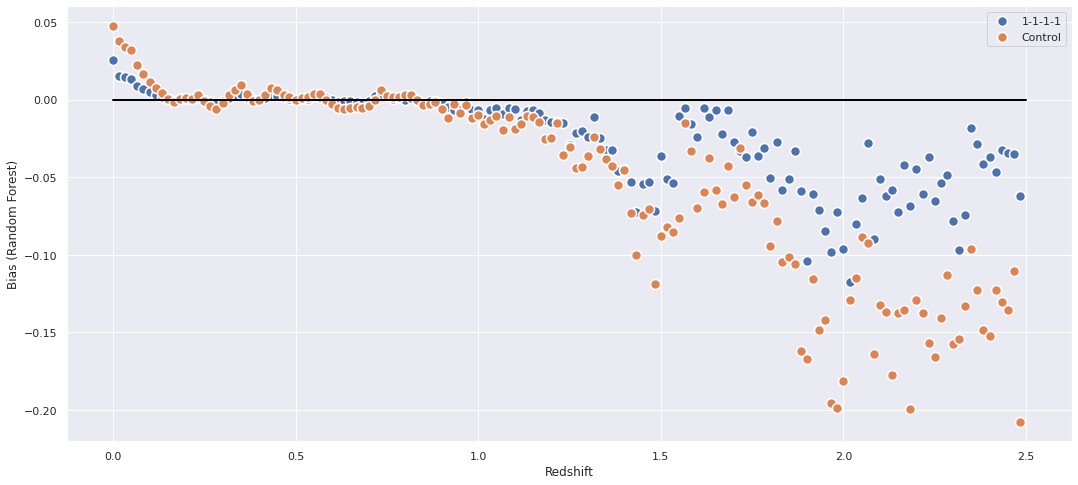

In [20]:
plot_bias([bias_rf_1111_over, bias_rf_ctrl_over], ['1-1-1-1', 'Control'], 'Bias (Random Forest)', 2.5)

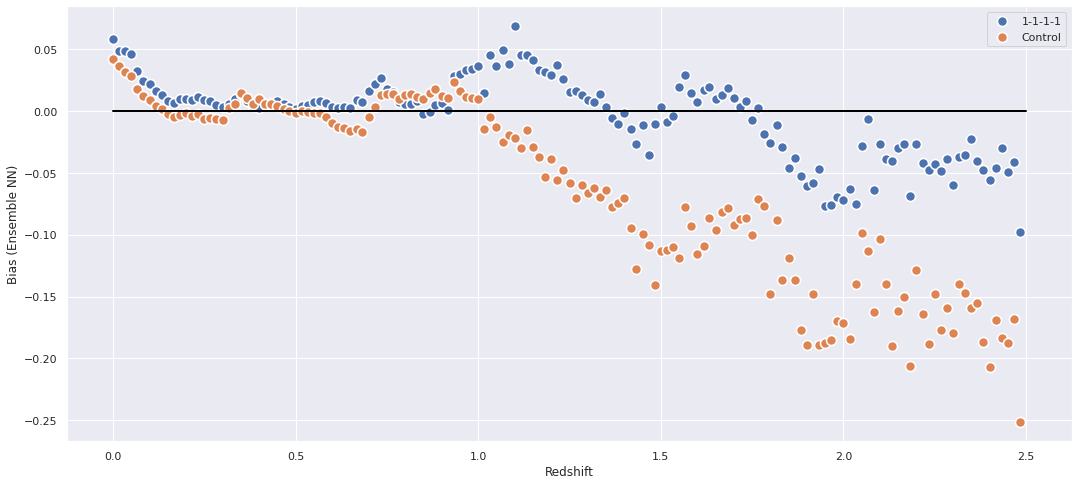

In [21]:
plot_bias([bias_ensemble_1111_over, bias_ensemble_ctrl_over], ['1-1-1-1', 'Control'], 'Bias (Ensemble NN)', 2.5)

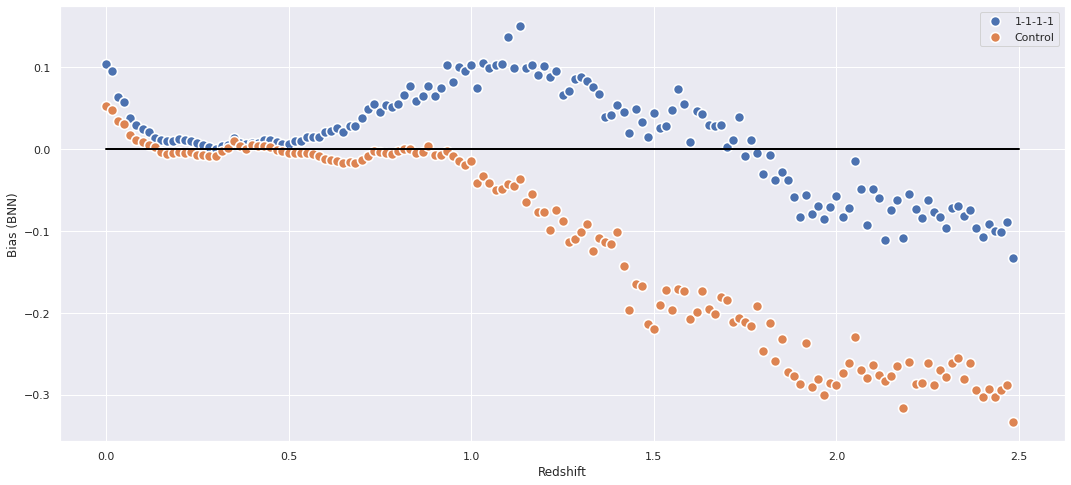

In [22]:
plot_bias([bias_bayesian_1111_over, bias_bayesian_ctrl_over], ['1-1-1-1', 'Control'], 'Bias (BNN)', 2.5)